### Problem 1 (50 points) 

Vapor-liquid equilibria data are correlated using two adjustable parameters $A_{12}$ and $A_{21}$ per binary
mixture. For low pressures, the equilibrium relation can be formulated as:

$$
\begin{aligned}
p = & x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{water}^{sat}\\
& + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$

Here the saturation pressures are given by the Antoine equation

$$
\log_{10}(p^{sat}) = a_1 - \frac{a_2}{T + a_3},
$$

where $T = 20$($^{\circ}{\rm C}$) and $a_{1,2,3}$ for a water - 1,4 dioxane
system is given below.

|             | $a_1$     | $a_2$      | $a_3$     |
|:------------|:--------|:---------|:--------|
| Water       | 8.07131 | 1730.63  | 233.426 |
| 1,4 dioxane | 7.43155 | 1554.679 | 240.337 |


The following table lists the measured data. Recall that in a binary system $x_1 + x_2 = 1$.

|$x_1$ | 0.0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 |
|:-----|:--------|:---------|:--------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
|$p$| 28.1 | 34.4 | 36.7 | 36.9 | 36.8 | 36.7 | 36.5 | 35.4 | 32.9 | 27.7 | 17.5 |

Estimate $A_{12}$ and $A_{21}$ using data from the above table: 

1. Formulate the least square problem; 
2. Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent or Newton's method implemented in HW1; 
3. Compare your optimized model with the data. Does your model fit well with the data?




#### Solution 

1.
The given problem can be formulated as a Least Squares problem as follows:

$$
\begin{aligned}
 \underset{A_{12},A_{21}}{\text{minimize: }} \sum_{i=1}^{N=11}(p(x_i;A_{12},A_{21})-p_i)^2
\end{aligned}
$$

<br>
2.

Saturation pressure for water:

$$
\log_{10}(p_{water}^{sat}) = a_1 - \frac{a_2}{T + a_3} = 8.07131 - \frac{1730.63}{20 + 233.426} = 1.24237
$$

<br>
$$
\Rightarrow p_{water}^{sat} = 17.47325
$$


Saturation pressure for 1,4dioxane:

$$
\log_{10}(p_{1,4dioxane}^{sat}) = a_1 - \frac{a_2}{T + a_3} = 7.43155 - \frac{1554.679}{20 + 240.337} = 1.45975
$$

<br> 	
$$
\Rightarrow p_{water}^{sat} = 28.82409
$$

<br>
With $x_2=1-x_1$, the equilibrium relation becomes:

$$
\begin{aligned}
p = & x_1\exp\left(A_{12}\left(\frac{A_{21}(1-x_1)}{A_{12}x_1+A_{21}(1-x_1)}\right)^2\right)p_{water}^{sat}\\
& + (1-x_1)\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}(1-x_1)}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$


Iteration: 0, Loss: 390.43841552734375 
Iteration: 10, Loss: 0.8190786242485046 
Iteration: 20, Loss: 0.6862062811851501 
Iteration: 30, Loss: 0.6719443798065186 
Iteration: 40, Loss: 0.6703857183456421 
Iteration: 50, Loss: 0.6702117919921875 
Iteration: 60, Loss: 0.6701946258544922 

Number of iterations: 67
Final loss value: 0.6701934933662415
Final error: 0.0
The solution is: A = [1.9583441 1.6892473]



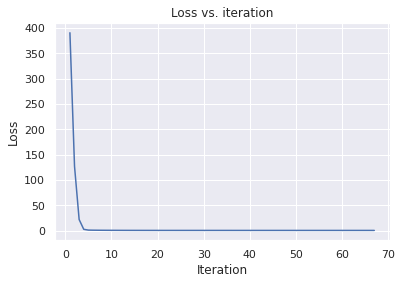

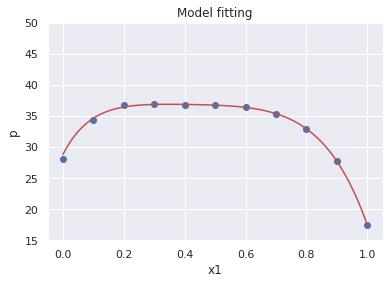

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import seaborn as sns


def saturation_pressure(T, a1, a2, a3):
    """Compute the saturation pressure."""

    log_p = a1 - (a2/(T + a3))
    p = 10**log_p
    return p


def gradient_descent(x1, p, water_sat_p, dioxane_sat_p, a, eps, max_iter):
    """
    Gradient Descent algorithm.
    
    Inputs:
      - x1(torch.FloatTensor): Input data
      - p(torch.FloatTensor):  Output data
      - water_sat_p(float):    Water saturation pressure
      - dioxane_sat_p(float):  1,4dioxane saturation pressure
      - a(float):              Learning rate
      - eps(float):            Tolerance
      - max_iter(int):         Maximum iterations before halting
    Returns:
      - A(torch.Tensor):       The model parameters (A12,A21)
      - loss_history(list):    Loss values at each iteration
    """

    # Initialize weights
    # A = torch.randn(2, requires_grad=True, device=device, dtype=torch.float)  # Randomly initialize weights
    A = torch.tensor([1, 1], requires_grad=True, device=device, dtype=torch.float) 
    
    loss_history = [float('inf')]  # The loss values history
    error = float('inf')           # Initialize error 
    iter = 0                       # Current iteration

    while error > eps and iter < max_iter:

        # Compute p prediction (Forward pass)
        p_pred = x1*torch.exp(A[0]*(A[1]*(1-x1)/(A[0]*x1+A[1]*(1-x1)))**2)*water_sat_p + \
                (1-x1)*torch.exp(A[1]*(A[0]*x1/(A[0]*x1+A[1]*(1-x1)))**2)*dioxane_sat_p
        
        # Compute loss
        loss = (p_pred - p).pow(2).sum()

        # Print loss every 10 iterations
        if iter % 10 == 0:
            print('Iteration: {}, Loss: {} '.format(iter, loss.item()))
        
        # Compute gradient of the loss wrt all the learnable parameters of the model
        loss.backward()

        # Current error 
        # error = torch.linalg.norm(A)       # gradient magnitude
        error =  abs(loss-loss_history[-1])  # difference in consecutive loss values

        # Update the weights using Gradient Descent
        with torch.no_grad():  # We don't need the GD algorithm itself to be differentiable wrt A
            A -= a * A.grad
        
            # Clear the gradients (so they don't accumulate)
            A.grad.zero_()
                
        iter += 1
        loss_history.append(loss)            # Save loss values
    
    print('\nNumber of iterations: {}'.format(iter))
    print('Final loss value: {}'.format(loss.data.numpy()))
    print('Final error: {}'.format(error))

    return A.data, loss_history


def plot_loss_history(loss_history):
    """
    Plot loss vs. iteration

    Inputs:
      - loss_history(list): Loss values at each iteration
    """

    sns.set_theme()
    plt.figure()
    plt.plot(loss_history)   
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss vs. iteration')
    plt.show()
    return

def plot_model_fit(A, x1, p, water_sat_p, dioxane_sat_p):
    """
    Plot the datapoints along with the fitted model.
    """

    # Generate points and predictions to create curve
    x = torch.linspace(0.0, 1.0)
    p_pred = x*torch.exp(A[0]*(A[1]*(1-x)/(A[0]*x+A[1]*(1-x)))**2)*water_sat_p + \
            (1-x)*torch.exp(A[1]*(A[0]*x/(A[0]*x+A[1]*(1-x)))**2)*dioxane_sat_p

    sns.set_theme()
    plt.figure()
    plt.scatter(x1, p, label='Data')
    plt.plot(x.detach().numpy(), p_pred.detach().numpy(),'r', label='Model')
    plt.xlabel('x1')
    plt.ylabel('p')
    plt.title('Model fitting')
    plt.ylim([15, 50])
    plt.show()


if __name__ == '__main__':

    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Parameters
    # --------------------------------------------------------------------------
    eps = 1e-9                       # Tolerance (termination criterion)
    max_iter = 10000                 # Maximum iterations before halting
    a = 0.001                        # Learning rate

    # Compute saturation pressures
    # --------------------------------------------------------------------------
    water_sat_p = saturation_pressure(T=20, a1=8.07131, a2=1730.63, a3=233.426)
    dioxane_sat_p = saturation_pressure(T=20, a1=7.43155, a2=1554.679, a3=240.337)

    # Solve Least Squares problem with Gradient Descent
    # --------------------------------------------------------------------------
    # Input data
    x1 = torch.tensor([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], device=device, dtype=torch.float)
    # Output data
    p = torch.tensor([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5], device=device, dtype=torch.float)

    # Fit model using Gradient Descent
    A, loss_history = gradient_descent(x1, p, water_sat_p, dioxane_sat_p, a, eps, max_iter)

    print('The solution is: A = {}\n'.format(A.data.numpy()))

    # Plots
    # --------------------------------------------------------------------------
    # Plot loss vs. iteration
    plot_loss_history(loss_history)

    # Plot the data and fitted model
    plot_model_fit(A, x1, p, water_sat_p, dioxane_sat_p)


The parameter values are: $A12 = 1.9583441, A21 = 1.6892473$

3.
As we can see from the figure above and after examining the residual plot and the R-squared value, we can conclude that the model is fitting the data quite well.

R^2 = 0.9981803894042969


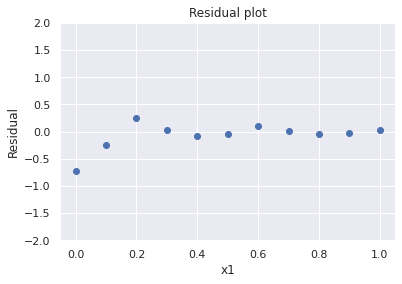

In [ ]:
# Compute residuals
p_pred = x1*torch.exp(A[0]*(A[1]*(1-x1)/(A[0]*x1+A[1]*(1-x1)))**2)*water_sat_p + \
                (1-x1)*torch.exp(A[1]*(A[0]*x1/(A[0]*x1+A[1]*(1-x1)))**2)*dioxane_sat_p
residuals = p - p_pred

# Plot residuals
plt.figure()
plt.scatter(x1, residuals)
plt.xlabel('x1')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.ylim([-2, 2])
plt.show

# Compute R^2 
RSS = residuals.pow(2).sum()
TSS = (p-torch.mean(p)).pow(2).sum()
R2 = 1-RSS/TSS
print('R^2 = {}'.format(R2))

---
### Problem 2 (50 points) 

Solve the following problem using Bayesian Optimization:
$$
    \min_{x_1, x_2} \quad \left(4-2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2,
$$
for $x_1 \in [-3,3]$ and $x_2 \in [-2,2]$. A tutorial on Bayesian Optimization can be found [here](https://thuijskens.github.io/2016/12/29/bayesian-optimisation/).



#### Solution 



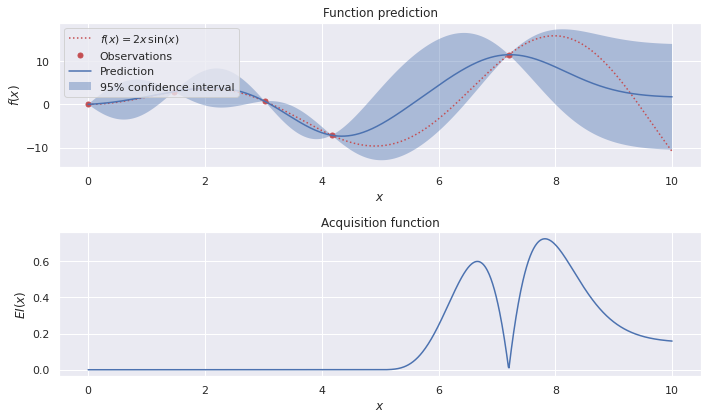

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import norm
import seaborn as sns

np.random.seed(1)

def f(x):
    """ The objective function to predict."""
    return 2 * x * np.sin(x)


def acquisition_fun(x, X_sample, gaussian_process):
    """ Expected Improvement (EI) acquisition function.

    Computes the EI at points x based on existing samples X_sample using a 
    Gaussian process surrogate model.
    Inputs:        
        - x(np.ndarray):        The points for which the EI needs to be computed
        - X_sample(np.ndarray): Sample points locations (n x d).
        - gaussian_process(GaussianProcessRegressor): GP fitted to the samples
    """

    # Find mean and variance for all points x
    mu, sigma = gaussian_process.predict(x, return_std=True)
    # Find mean and variance for sampled points
    mu_sample = gaussian_process.predict(X_sample)
    # Find mean for current optimal point
    mu_best = np.max(mu_sample)  

    # Compute expected improvement for all points x
    with np.errstate(divide='ignore'):  # In case sigma equals zero
        Z = (mu - mu_best)/sigma
        expected_improvement = (mu - mu_best)*norm.cdf(Z) + sigma*norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0  

    # # -------
    # sigma = sigma.reshape(-1, 1)

    # x_to_predict = x.reshape(-1, n_params)
    
    return expected_improvement


def bayesian_optimization(f, max_iter, bounds):    
    """ Bayesian Optimization.

    Probabilistic method for global optimization of a black-box objective 
    function by using Gaussian Processes. 
    Inputs:        
        - f(function):         Objective function to be optimized
        - max_iter(int):       Maximum iterations to run the algorithm
        - bounds(np.ndarray):  Lower and upper bounds on the parameters of the objective function (n_params,2)
    Returns:
        - X(np.ndarray):       The collection of sampled datapoint locations 
        - Y(np.ndarray):       The corresponding y values for the X datapoints
        - model(GaussianProcessRegressor): Our belief of the objective function
    """   

    # Sample objective function for N initial points
    N = 5                              # Number of initial points to sample    
    for bound in bounds:
        x_points = np.random.uniform(bound[0],bound[1],N)
        X = np.atleast_2d(x_points).T  # Sample points
        Y = f(x_points)                # Observations
    
    # Define the Gaussian Process (GP) model
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) 
    model = gp.GaussianProcessRegressor(kernel=kernel,
                                        alpha=1e-10,
                                        n_restarts_optimizer=10,
                                        normalize_y=True)
    for i in range(max_iter):
        # Update the belief of the objective function
        model.fit(X, Y)

        # # Find best next point to sample by maximizing the acquisition function
        # next_sample = best_next_sample(model, Y)

        # # Evaluate the objective function at the new best point
        # next_y = f(next_sample)

        # # Augment the data 
        # X = np.append(X, next_sample)
        # Y = np.append(Y, next_y)
    

    return X, Y, model

def plot_bayesian_opt(X, Y, model, EI):
    """ Plot the objective function, the prediction and the 95% confidence interval."""

    sns.set_theme()
    fig, axs = plt.subplots(2, 1, figsize=(10,6))
    axs[0].plot(x, f(x), 'r:', label=r'$f(x) = 2x\,\sin(x)$')               # Objective function
    axs[0].plot(X_data, Y_data, 'r.', markersize=10, label='Observations')  # Observations
    axs[0].plot(x, y_pred, 'b-', label='Prediction')                        # Belief of the objective function
    axs[0].fill(np.concatenate([x, x[::-1]]),
            np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
            alpha=.4, fc='b', ec='None', label='95% confidence interval')
    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$f(x)$')
    # axs[0].set_ylim(-10, 20)
    axs[0].set_title('Function prediction')
    axs[0].legend(loc='upper left')

    # Acquisition fun plot
    axs[1].plot(x, EI, 'b')
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$EI(x)$')
    axs[1].set_title('Acquisition function')

    fig.tight_layout()
    plt.show()


if __name__ == "__main__":

    bounds = np.array([[0, 10.0]])
    
    # Predict the objective function
    X_data, Y_data, model = bayesian_optimization(f, 1, bounds)

    # Mesh the input space for evaluations of the real function, the prediction 
    x = np.atleast_2d(np.linspace(0, 10, 1000)).T

    # Make the prediction on the meshed x-axis
    y_pred, sigma = model.predict(x, return_std=True)


    EI = acquisition_fun(x, X_data, model)

    # Plot the objective function, prediction and 95% confidence interval
    plot_bayesian_opt(X_data, Y_data, model, EI)

